# Educational Data Masking with Delphix: Privacy in Academic Environments

This notebook demonstrates the application of Delphix masking techniques to educational data, with special consideration for:
- FERPA compliance
- COPPA requirements
- State-specific education privacy laws
- Educational research needs
- Cross-institutional data sharing requirements

In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta
import uuid
from scipy.stats import norm
import matplotlib.pyplot as plt
# Set up our environment
fake = Faker()
np.random.seed(42)
random.seed(42)

# Constants for data generation
CURRENT_YEAR = 2024
SCHOOL_YEARS = range(9, 13)  # High school grades 9-12
SUBJECTS = ['Math', 'English', 'Science', 'History', 'Foreign Language', 'Art', 'Physical Education']
ETHNICITIES = ['White', 'Hispanic/Latino', 'Black/African American', 'Asian', 'Native American', 'Pacific Islander', 'Two or More Races']
ACCOMMODATIONS = ['Extended Time', 'Separate Setting', 'Read Aloud', 'Use of Calculator', 'None']
PROGRAMS = ['General Education', 'Special Education', 'Gifted/Talented', 'English Language Learner', 'Section 504']
LUNCH_STATUS = ['Full Price', 'Reduced Price', 'Free']
ATTENDANCE_CODES = ['Present', 'Excused Absence', 'Unexcused Absence', 'Tardy', 'Early Dismissal']
BEHAVIOR_TYPES = ['Positive Behavior', 'Minor Infraction', 'Major Infraction', 'None']
EXTRACURRICULAR = ['Sports', 'Music', 'Drama', 'Student Government', 'Academic Club', 'None']

In [2]:
def generate_student_base(num_students=10000):
    """Generate base student demographic and enrollment data"""
    students = []
    
    for _ in range(num_students):
        grade = random.choice(SCHOOL_YEARS)
        dob_year = CURRENT_YEAR - (grade + 6)  # Approximate age for grade
        
        student = {
            'student_id': str(uuid.uuid4())[:8].upper(),  # Short UUID as student ID
            'state_id': fake.unique.random_number(digits=10, fix_len=True),
            'first_name': fake.first_name(),
            'last_name': fake.last_name(),
            'dob': fake.date_of_birth(minimum_age=grade+5, maximum_age=grade+7),
            'grade_level': grade,
            'enrollment_date': fake.date_between(start_date='-4y', end_date='today'),
            'ethnicity': random.choice(ETHNICITIES),
            'gender': random.choice(['M', 'F', 'NB']),
            'primary_language': random.choice(['English', 'Spanish', 'Chinese', 'Vietnamese', 'Arabic']),
            'program': random.choice(PROGRAMS),
            'lunch_status': random.choice(LUNCH_STATUS),
            
            # Guardian Information
            'guardian1_name': fake.name(),
            'guardian1_relationship': random.choice(['Mother', 'Father', 'Grandmother', 'Grandfather', 'Guardian']),
            'guardian1_phone': fake.phone_number(),
            'guardian1_email': fake.email(),
            'guardian2_name': fake.name() if random.random() > 0.3 else None,
            
            # Address Information
            'street_address': fake.street_address(),
            'city': fake.city(),
            'state': fake.state_abbr(),
            'zip_code': fake.zipcode(),
            
            # Health and Accommodations
            'accommodations': random.choice(ACCOMMODATIONS),
            'medical_alert': 'Yes' if random.random() < 0.1 else 'No',
            'immunization_status': random.choice(['Complete', 'Incomplete', 'Exempt']),
            
            # Additional Demographics
            'transportation': random.choice(['Bus', 'Parent Transport', 'Self Transport', 'Walk']),
            'extracurricular': random.choice(EXTRACURRICULAR)
        }
        students.append(student)
    
    return pd.DataFrame(students)

# Generate base student data
student_df = generate_student_base()
print(f"Generated {len(student_df)} student records")
student_df.head()

Generated 10000 student records


,student_id,state_id,first_name,last_name,dob,grade_level,enrollment_date,ethnicity,gender,primary_language,...,guardian2_name,street_address,city,state,zip_code,accommodations,medical_alert,immunization_status,transportation,extracurricular
0,95CDEDAF,1263081213,Lindsey,Rogers,2010-08-10,9,2024-07-22,White,NB,Chinese,...,Amy Heath,57928 Kelly Skyway,Lake Valerie,NH,64637,None,Yes,Incomplete,Bus,Sports
1,8174CCCE,2215376661,Philip,Wolf,2009-12-15,9,2023-01-02,Hispanic/Latino,M,Arabic,...,None,183 Christy Ridges Suite 855,Nathanport,IA,41167,None,No,Incomplete,Self Transport,Sports
2,7B87B768,4549059777,Jaime,Evans,2007-11-23,10,2022-12-22,Pacific Islander,F,Chinese,...,Thomas Mendoza,2901 Reed Locks,Greentown,RI,41978,Read Aloud,No,Incomplete,Bus,Drama
3,89808812,9937903338,Jessica,Moore,2006-07-28,11,2021-03-15,Native American,F,English,...,Erik Harrell,017 Richard Forges,Powellville,NH,43126,Use of Calculator,Yes,Incomplete,Self Transport,Academic Club
4,32901670,3928146160,Sarah,Reed,2009-06-17,10,2024-04-05,Pacific Islander,M,English,...,Kayla Jordan PhD,797 Mccall Tunnel,Lake Stephanie,HI,02940,Extended Time,No,Incomplete,Self Transport,Music


In [3]:
def generate_academic_records(student_df):
    """Generate academic records for each student"""
    academic_records = []
    
    for _, student in student_df.iterrows():
        # Generate records for each subject
        for subject in SUBJECTS:
            # Generate records for each quarter
            for quarter in range(1, 5):
                # Base grade distribution around a mean with some variation
                base_grade = np.random.normal(82, 10)
                
                # Adjust grade based on program participation
                if student['program'] == 'Gifted/Talented':
                    base_grade += np.random.normal(8, 2)
                elif student['program'] == 'English Language Learner':
                    if subject == 'English':
                        base_grade -= np.random.normal(5, 2)
                
                # Ensure grades are within realistic bounds
                final_grade = max(min(round(base_grade, 1), 100), 0)
                
                record = {
                    'student_id': student['student_id'],
                    'school_year': CURRENT_YEAR,
                    'grade_level': student['grade_level'],
                    'subject': subject,
                    'quarter': quarter,
                    'grade': final_grade,
                    'teacher_name': fake.name(),
                    'comments': random.choice([
                        'Excellent participation',
                        'Shows improvement',
                        'Needs more practice',
                        'Outstanding work',
                        'Missing assignments',
                        None
                    ])
                }
                academic_records.append(record)
    
    return pd.DataFrame(academic_records)

# Generate academic records
academic_df = generate_academic_records(student_df)
print(f"Generated {len(academic_df)} academic records")
academic_df.head()

Generated 280000 academic records


,student_id,school_year,grade_level,subject,quarter,grade,teacher_name,comments
0,95CDEDAF,2024,9,Math,1,87.0,Timothy Lane,Outstanding work
1,95CDEDAF,2024,9,Math,2,80.6,Emma Bowman,Missing assignments
2,95CDEDAF,2024,9,Math,3,88.5,Craig Barnes,None
3,95CDEDAF,2024,9,Math,4,97.2,David Smith,Outstanding work
4,95CDEDAF,2024,9,English,1,79.7,Stephanie White,Missing assignments


In [4]:
def generate_attendance_records(student_df):
    """Generate daily attendance records for each student"""
    attendance_records = []
    
    # Generate one semester of attendance (90 days)
    school_days = pd.date_range(
        start='2024-01-01', 
        periods=90, 
        freq='B'  # Business days
    )
    
    for _, student in student_df.iterrows():
        # Set student-specific attendance patterns
        attendance_pattern = np.random.choice(
            ['Regular', 'Frequent Absences', 'Occasional Tardies'],
            p=[0.8, 0.1, 0.1]
        )
        
        for day in school_days:
            if attendance_pattern == 'Regular':
                status_weights = [0.95, 0.02, 0.01, 0.02, 0.0]
            elif attendance_pattern == 'Frequent Absences':
                status_weights = [0.75, 0.10, 0.10, 0.05, 0.0]
            else:  # Occasional Tardies
                status_weights = [0.85, 0.02, 0.01, 0.12, 0.0]
            
            status = np.random.choice(ATTENDANCE_CODES, p=status_weights)
            
            record = {
                'student_id': student['student_id'],
                'date': day,
                'status': status,
                'grade_level': student['grade_level'],
                'recorded_by': fake.name(),
                'note': random.choice([
                    'Doctor appointment',
                    'Family emergency',
                    'Transportation issues',
                    None,
                    None,
                    None
                ]) if status != 'Present' else None
            }
            attendance_records.append(record)
    
    return pd.DataFrame(attendance_records)

# Generate attendance records
attendance_df = generate_attendance_records(student_df)
print(f"Generated {len(attendance_df)} attendance records")
attendance_df.head()

Generated 900000 attendance records


,student_id,date,status,grade_level,recorded_by,note
0,95CDEDAF,2024-01-01,Present,9,Tonya Rodriguez,None
1,95CDEDAF,2024-01-02,Present,9,Carol Mendez,None
2,95CDEDAF,2024-01-03,Present,9,Christopher Smith,None
3,95CDEDAF,2024-01-04,Present,9,Jennifer Howe,None
4,95CDEDAF,2024-01-05,Present,9,Melanie Gutierrez,None


In [5]:
def generate_assessment_data(student_df):
    """Generate standardized test scores and other assessments"""
    assessment_records = []
    
    # Define different types of assessments
    ASSESSMENTS = {
        'State Standardized Test': {
            'subjects': ['Math', 'Reading', 'Science'],
            'score_range': (600, 900)
        },
        'College Readiness': {
            'subjects': ['Verbal', 'Math', 'Writing'],
            'score_range': (200, 800)
        },
        'Language Proficiency': {
            'subjects': ['Reading', 'Writing', 'Speaking', 'Listening'],
            'score_range': (1, 6)
        }
    }
    
    for _, student in student_df.iterrows():
        # Generate state test scores for all students
        for subject in ASSESSMENTS['State Standardized Test']['subjects']:
            base_score = np.random.normal(750, 50)
            
            # Adjust scores based on student program
            if student['program'] == 'Gifted/Talented':
                base_score += np.random.normal(50, 10)
            elif student['program'] == 'English Language Learner' and subject == 'Reading':
                base_score -= np.random.normal(30, 10)
                
            score = max(min(round(base_score), 900), 600)
            
            record = {
                'student_id': student['student_id'],
                'assessment_type': 'State Standardized Test',
                'subject': subject,
                'date': fake.date_between(start_date='-6m', end_date='-1m'),
                'score': score,
                'percentile': round(norm.cdf((score - 750) / 50) * 100),
                'accommodations_used': student['accommodations'],
                'grade_level': student['grade_level']
            }
            assessment_records.append(record)
        
        # Generate college readiness scores for 11th and 12th graders
        if student['grade_level'] in [11, 12]:
            for subject in ASSESSMENTS['College Readiness']['subjects']:
                score = round(np.random.normal(550, 100))
                score = max(min(score, 800), 200)
                
                record = {
                    'student_id': student['student_id'],
                    'assessment_type': 'College Readiness',
                    'subject': subject,
                    'date': fake.date_between(start_date='-6m', end_date='-1m'),
                    'score': score,
                    'percentile': round(norm.cdf((score - 550) / 100) * 100),
                    'accommodations_used': student['accommodations'],
                    'grade_level': student['grade_level']
                }
                assessment_records.append(record)
        
        # Generate language proficiency scores for ELL students
        if student['program'] == 'English Language Learner':
            for subject in ASSESSMENTS['Language Proficiency']['subjects']:
                score = round(np.random.normal(3.5, 0.8), 1)
                score = max(min(score, 6.0), 1.0)
                
                record = {
                    'student_id': student['student_id'],
                    'assessment_type': 'Language Proficiency',
                    'subject': subject,
                    'date': fake.date_between(start_date='-6m', end_date='-1m'),
                    'score': score,
                    'level': int(score),
                    'accommodations_used': student['accommodations'],
                    'grade_level': student['grade_level']
                }
                assessment_records.append(record)
    
    return pd.DataFrame(assessment_records)

# Generate assessment records
assessment_df = generate_assessment_data(student_df)
print(f"Generated {len(assessment_df)} assessment records")
assessment_df.head()

Generated 53026 assessment records


,student_id,assessment_type,subject,date,score,percentile,accommodations_used,grade_level,level
0,95CDEDAF,State Standardized Test,Math,2024-12-18,674.0,6.0,None,9,NaN
1,95CDEDAF,State Standardized Test,Reading,2024-12-18,717.0,25.0,None,9,NaN
2,95CDEDAF,State Standardized Test,Science,2024-12-18,720.0,27.0,None,9,NaN
3,8174CCCE,State Standardized Test,Math,2024-12-18,700.0,16.0,None,9,NaN
4,8174CCCE,State Standardized Test,Reading,2024-12-18,700.0,16.0,None,9,NaN


In [6]:
def generate_behavioral_records(student_df):
    """Generate student behavioral records"""
    behavioral_records = []
    
    # Incident types and their relative frequencies
    INCIDENT_TYPES = {
        'Minor': {
            'incidents': [
                'Tardiness', 'Dress Code Violation', 'Classroom Disruption', 
                'Electronic Device Usage', 'Missing Homework'
            ],
            'frequency': 0.15  # 15% chance per student per month
        },
        'Major': {
            'incidents': [
                'Academic Dishonesty', 'Bullying', 'Harassment',
                'Fighting', 'Property Damage'
            ],
            'frequency': 0.03  # 3% chance per student per month
        },
        'Positive': {
            'incidents': [
                'Helping Others', 'Academic Achievement', 'Leadership',
                'Community Service', 'School Spirit'
            ],
            'frequency': 0.20  # 20% chance per student per month
        }
    }
    
    # Generate records for one semester (6 months)
    months = pd.date_range(start='2024-01-01', end='2024-06-30', freq='M')
    
    for _, student in student_df.iterrows():
        # Set student-specific behavior pattern
        behavior_modifier = np.random.normal(1, 0.3)
        
        for month in months:
            # Generate incidents based on probabilities
            for severity, details in INCIDENT_TYPES.items():
                if np.random.random() < (details['frequency'] * behavior_modifier):
                    incident = random.choice(details['incidents'])
                    
                    record = {
                        'student_id': student['student_id'],
                        'date': fake.date_between(
                            start_date=month - pd.Timedelta(days=30),
                            end_date=month
                        ),
                        'incident_type': severity,
                        'incident': incident,
                        'location': random.choice([
                            'Classroom', 'Hallway', 'Cafeteria', 
                            'Playground', 'Gym', 'Bus'
                        ]),
                        'reported_by': fake.name(),
                        'action_taken': random.choice([
                            'Verbal Warning', 'Parent Contact', 
                            'Detention', 'Office Referral', 'Counselor Referral',
                            'Positive Recognition', 'Award Given'
                        ]) if severity != 'Positive' else 'Recognition',
                        'parent_contacted': random.choice([True, False]),
                        'grade_level': student['grade_level']
                    }
                    behavioral_records.append(record)
    
    return pd.DataFrame(behavioral_records)

# Generate behavioral records
behavior_df = generate_behavioral_records(student_df)
print(f"Generated {len(behavior_df)} behavioral records")
behavior_df.head()

/var/folders/j7/smpqy2fn30l7j5kcqh76jqp40000gn/T/ipykernel_84864/1318671494.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2024-01-01', end='2024-06-30', freq='M')


Generated 22836 behavioral records


,student_id,date,incident_type,incident,location,reported_by,action_taken,parent_contacted,grade_level
0,95CDEDAF,2024-01-12,Minor,Missing Homework,Gym,Kimberly Munoz,Award Given,False,9
1,95CDEDAF,2024-01-19,Positive,Leadership,Playground,Jason Owens,Recognition,True,9
2,95CDEDAF,2024-02-02,Positive,Academic Achievement,Classroom,Joshua Swanson,Recognition,True,9
3,95CDEDAF,2024-03-14,Positive,Community Service,Bus,Douglas Manning,Recognition,True,9
4,95CDEDAF,2024-04-24,Positive,Leadership,Gym,Laura Gomez,Recognition,False,9


In [7]:
def generate_program_participation(student_df):
    """Generate program participation and services records"""
    program_records = []
    
    # Define various programs and services
    PROGRAM_TYPES = {
        'Academic Support': [
            'Reading Intervention', 'Math Intervention', 
            'Writing Workshop', 'Study Skills'
        ],
        'Special Education': [
            'Resource Room', 'Speech Therapy', 'Occupational Therapy',
            'Physical Therapy', 'Social Skills Group'
        ],
        'Gifted/Talented': [
            'Advanced Placement', 'International Baccalaureate',
            'STEM Enrichment', 'Arts Enrichment'
        ],
        'Language Support': [
            'ESL Classes', 'Bilingual Education',
            'Native Language Support', 'Cultural Integration'
        ],
        'Social Services': [
            'Counseling', 'Social Work Services',
            'Behavioral Support', 'Family Outreach'
        ]
    }
    
    for _, student in student_df.iterrows():
        # Determine number of programs based on student's primary program
        if student['program'] == 'Special Education':
            num_programs = random.randint(2, 4)
            primary_category = 'Special Education'
        elif student['program'] == 'Gifted/Talented':
            num_programs = random.randint(1, 3)
            primary_category = 'Gifted/Talented'
        elif student['program'] == 'English Language Learner':
            num_programs = random.randint(1, 3)
            primary_category = 'Language Support'
        else:
            num_programs = random.randint(0, 2)
            primary_category = 'Academic Support'
        
        # Generate program participation records
        programs_assigned = []
        
        # Always add at least one program from primary category
        if primary_category in PROGRAM_TYPES:
            primary_program = random.choice(PROGRAM_TYPES[primary_category])
            programs_assigned.append((primary_category, primary_program))
            num_programs = max(0, num_programs - 1)
        
        # Add additional programs
        while len(programs_assigned) < num_programs:
            category = random.choice(list(PROGRAM_TYPES.keys()))
            program = random.choice(PROGRAM_TYPES[category])
            if (category, program) not in programs_assigned:
                programs_assigned.append((category, program))
        
        # Create records for each assigned program
        for category, program in programs_assigned:
            start_date = fake.date_between(
                start_date='-1y',
                end_date='-1m'
            )
            
            record = {
                'student_id': student['student_id'],
                'program_category': category,
                'program_name': program,
                'start_date': start_date,
                'end_date': fake.date_between(
                    start_date=start_date,
                    end_date='+1y'
                ) if random.random() < 0.3 else None,
                'frequency': random.choice([
                    'Daily', 'Weekly', 'Bi-Weekly', 'Monthly'
                ]),
                'service_provider': fake.name(),
                'location': random.choice([
                    'Main Campus', 'Resource Room', 'Library',
                    'Satellite Location', 'Online'
                ]),
                'funding_source': random.choice([
                    'District', 'State Grant', 'Federal Grant',
                    'Title I', 'Special Education'
                ]),
                'notes': random.choice([
                    'Making good progress',
                    'Requires continued support',
                    'Consider program adjustment',
                    'Meeting program goals',
                    None
                ])
            }
            program_records.append(record)
    
    return pd.DataFrame(program_records)

# Generate program participation records
program_df = generate_program_participation(student_df)
print(f"Generated {len(program_df)} program participation records")
program_df.head()

Generated 13226 program participation records


,student_id,program_category,program_name,start_date,end_date,frequency,service_provider,location,funding_source,notes
0,95CDEDAF,Special Education,Speech Therapy,2024-06-19,2024-10-17,Weekly,Ellen Smith,Resource Room,Title I,Requires continued support
1,95CDEDAF,Social Services,Counseling,2024-08-11,None,Weekly,Cory Edwards,Main Campus,State Grant,Making good progress
2,95CDEDAF,Gifted/Talented,International Baccalaureate,2024-11-11,2025-06-03,Daily,Christopher Carpenter,Resource Room,District,Requires continued support
3,8174CCCE,Academic Support,Math Intervention,2024-01-17,2024-08-07,Bi-Weekly,Michele Brock,Resource Room,State Grant,Meeting program goals
4,7B87B768,Gifted/Talented,International Baccalaureate,2024-12-04,None,Bi-Weekly,Amy Smith,Library,State Grant,Requires continued support


In [8]:
def generate_health_records(student_df):
    """Generate student health and medical records"""
    health_records = []
    
    # Define health-related constants
    HEALTH_CONDITIONS = {
        'Asthma': 0.08,
        'Allergies': 0.15,
        'ADHD': 0.07,
        'Diabetes Type 1': 0.02,
        'Seizure Disorder': 0.01,
        'Vision Impairment': 0.05,
        'Hearing Impairment': 0.03,
        'None': 0.59
    }
    
    MEDICATIONS = {
        'Asthma': ['Albuterol', 'Flovent', 'Singulair'],
        'Allergies': ['Zyrtec', 'Claritin', 'Benadryl'],
        'ADHD': ['Ritalin', 'Adderall', 'Concerta'],
        'Diabetes Type 1': ['Insulin'],
        'Seizure Disorder': ['Keppra', 'Depakote', 'Tegretol'],
    }
    
    for _, student in student_df.iterrows():
        # Generate basic health record
        base_record = {
            'student_id': student['student_id'],
            'height': round(np.random.normal(
                160 + (student['grade_level'] - 9) * 3, 10
            ), 1),  # cm
            'weight': round(np.random.normal(
                55 + (student['grade_level'] - 9) * 3, 8
            ), 1),  # kg
            # Generate blood type if not present in student record
            'blood_type': random.choice(['A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-']),
            'vision_left': random.choice(['20/20', '20/30', '20/40', '20/50']),
            'vision_right': random.choice(['20/20', '20/30', '20/40', '20/50']),
            'hearing_test': random.choice(['Pass', 'Fail', 'Not Tested']),
            'last_physical_date': fake.date_between(start_date='-1y', end_date='today'),
            'physician_name': fake.name(),
            'physician_phone': fake.phone_number(),
            'emergency_contact_name': student['guardian1_name'],
            'emergency_contact_phone': student['guardian1_phone']
        }
        health_records.append(base_record)
        
        # Generate condition-specific records
        for condition, probability in HEALTH_CONDITIONS.items():
            if random.random() < probability and condition != 'None':
                medications = MEDICATIONS.get(condition, [])
                record = {
                    'student_id': student['student_id'],
                    'condition': condition,
                    'diagnosis_date': fake.date_between(
                        start_date='-5y', 
                        end_date='today'
                    ),
                    'medication': random.choice(medications) if medications else None,
                    'dosage': random.choice([
                        'Once daily', 'Twice daily', 'As needed'
                    ]) if medications else None,
                    'provider_name': fake.name(),
                    'last_review_date': fake.date_between(
                        start_date='-6m', 
                        end_date='today'
                    ),
                    'school_accommodations_required': random.choice([True, False]),
                    'emergency_plan_on_file': random.choice([True, False]),
                    'notes': random.choice([
                        'Well controlled',
                        'Regular monitoring required',
                        'Emergency medication on file',
                        None
                    ])
                }
                health_records.append(record)
                
        # Generate immunization records
        immunizations = {
            'MMR': {'doses': 2, 'required': True},
            'Tdap': {'doses': 1, 'required': True},
            'Varicella': {'doses': 2, 'required': True},
            'Hepatitis B': {'doses': 3, 'required': True},
            'Meningococcal': {'doses': 1, 'required': True},
            'HPV': {'doses': 3, 'required': False},
            'Flu': {'doses': 1, 'required': False}
        }
        
        for vaccine, details in immunizations.items():
            for dose in range(details['doses']):
                record = {
                    'student_id': student['student_id'],
                    'immunization': vaccine,
                    'dose_number': dose + 1,
                    'date_administered': fake.date_between(
                        start_date='-5y', 
                        end_date='today'
                    ),
                    'administered_by': fake.name(),
                    'lot_number': fake.bothify(text='??###?'),
                    'required': details['required'],
                    'facility': fake.company()
                }
                health_records.append(record)
    
    return pd.DataFrame(health_records)

# Generate health records
health_df = generate_health_records(student_df)
print(f"Generated {len(health_df)} health records")
health_df.head()

Generated 144151 health records


,student_id,height,weight,blood_type,vision_left,vision_right,hearing_test,last_physical_date,physician_name,physician_phone,...,school_accommodations_required,emergency_plan_on_file,notes,immunization,dose_number,date_administered,administered_by,lot_number,required,facility
0,95CDEDAF,162.6,49.6,AB+,20/20,20/30,Pass,2024-10-31,Elizabeth Sanchez,(844)656-3621x990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,95CDEDAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,Emergency medication on file,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95CDEDAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,MMR,1.0,2020-04-18,Jessica Lee,cr053g,True,Mcdaniel-Bond
3,95CDEDAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,MMR,2.0,2024-03-07,Christopher Adams,iw364U,True,Rogers-Bennett
4,95CDEDAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tdap,1.0,2024-06-14,Paul Charles,vb028t,True,"Ellison, Kramer and Atkins"


In [9]:
def generate_course_schedules(student_df):
    """Generate student course schedules and enrollment data"""
    schedule_records = []
    
    # Define course catalog
    COURSE_CATALOG = {
        'Math': {
            9: ['Algebra I', 'Geometry'],
            10: ['Geometry', 'Algebra II'],
            11: ['Algebra II', 'Pre-Calculus'],
            12: ['Pre-Calculus', 'AP Calculus', 'Statistics']
        },
        'English': {
            9: ['English 9', 'English 9 Honors'],
            10: ['English 10', 'English 10 Honors'],
            11: ['English 11', 'AP Language'],
            12: ['English 12', 'AP Literature']
        },
        'Science': {
            9: ['Biology', 'Biology Honors'],
            10: ['Chemistry', 'Chemistry Honors'],
            11: ['Physics', 'AP Biology'],
            12: ['AP Chemistry', 'AP Physics', 'Environmental Science']
        },
        'Social Studies': {
            9: ['World History', 'World History Honors'],
            10: ['US History', 'AP US History'],
            11: ['Government', 'AP Government'],
            12: ['Economics', 'AP Economics']
        },
        'Foreign Language': {
            9: ['Spanish I', 'French I', 'Chinese I'],
            10: ['Spanish II', 'French II', 'Chinese II'],
            11: ['Spanish III', 'French III', 'Chinese III'],
            12: ['AP Spanish', 'AP French', 'AP Chinese']
        }
    }
    
    # Class periods
    PERIODS = range(1, 8)
    
    for _, student in student_df.iterrows():
        grade = student['grade_level']
        
        # Assign core courses based on grade and program
        assigned_periods = {}
        for subject, courses in COURSE_CATALOG.items():
            if grade in courses:
                # Select appropriate course level based on student program
                available_courses = courses[grade]
                if student['program'] == 'Gifted/Talented':
                    course = [c for c in available_courses if 'AP' in c or 'Honors' in c]
                    course = course[-1] if course else available_courses[0]
                else:
                    course = available_courses[0]
                
                # Assign to a random available period
                available_periods = [p for p in PERIODS if p not in assigned_periods]
                period = random.choice(available_periods)
                assigned_periods[period] = (subject, course)
        
        # Create schedule records
        for period, (subject, course) in assigned_periods.items():
            record = {
                'student_id': student['student_id'],
                'course_name': course,
                'subject': subject,
                'period': period,
                'room_number': f"{random.randint(1, 3)}{random.randint(0, 9)}{random.randint(0, 9)}",
                'teacher_name': fake.name(),
                'semester': 1,  # Assuming first semester
                'school_year': CURRENT_YEAR,
                'credits': 1.0,
                'status': 'Enrolled',
                'section_id': fake.bothify(text='??###'),
                'max_capacity': 30,
                'current_enrollment': random.randint(20, 30)
            }
            schedule_records.append(record)
    
    return pd.DataFrame(schedule_records)

# Generate course schedules
schedule_df = generate_course_schedules(student_df)
print(f"Generated {len(schedule_df)} course enrollment records")
schedule_df.head()

Generated 50000 course enrollment records


,student_id,course_name,subject,period,room_number,teacher_name,semester,school_year,credits,status,section_id,max_capacity,current_enrollment
0,95CDEDAF,Algebra I,Math,7,398,David Wilson,1,2024,1.0,Enrolled,in593,30,25
1,95CDEDAF,English 9,English,5,374,Miss Jennifer Saunders,1,2024,1.0,Enrolled,Pq178,30,27
2,95CDEDAF,Biology,Science,2,347,Christopher Fitzgerald,1,2024,1.0,Enrolled,rk087,30,23
3,95CDEDAF,World History,Social Studies,1,354,Jason Smith,1,2024,1.0,Enrolled,jR910,30,29
4,95CDEDAF,Spanish I,Foreign Language,6,298,Andrew Fuller,1,2024,1.0,Enrolled,Lv719,30,21


In [10]:
class EducationalDataMasker:
    """Specialized masking implementation for educational data following FERPA guidelines"""
    
    def __init__(self):
        self.fake = Faker()
        self.masking_cache = {}
        self.seed_value = 42
        np.random.seed(self.seed_value)
        
    def _get_cached_value(self, original, category):
        """Ensure consistent masking for the same input values"""
        cache_key = f"{category}_{original}"
        if cache_key not in self.masking_cache:
            self.masking_cache[cache_key] = self._generate_mask(original, category)
        return self.masking_cache[cache_key]
    
    def _generate_mask(self, original, category):
        """Generate appropriate masked value based on data category"""
        if category == 'name':
            return self.fake.name()
        elif category == 'student_id':
            return f"MASK{str(uuid.uuid4())[:8].upper()}"
        elif category == 'address':
            return self.fake.address()
        elif category == 'guardian':
            return self.fake.name()
        elif category == 'phone':
            return self.fake.phone_number()
        elif category == 'email':
            return self.fake.email()
        elif category == 'ssn':
            return self.fake.ssn()
        elif category == 'health_condition':
            return f"CONDITION_{random.randint(1000, 9999)}"
        return f"MASKED_{category.upper()}"
    
    def mask_directory_information(self, df):
        """Mask directory information while preserving educational context"""
        masked_df = df.copy()
        
        # Directory information masking (can be released under FERPA unless opted out)
        directory_columns = {
            'name': 'name',
            'grade_level': None,  # Preserve as is
            'enrollment_date': None,  # Preserve as is
            'graduation_year': None,  # Preserve as is
            'program': None,  # Preserve as is
            'activities': None  # Preserve as is
        }
        
        for col, mask_type in directory_columns.items():
            if col in masked_df and mask_type:
                masked_df[col] = masked_df[col].apply(
                    lambda x: self._get_cached_value(x, mask_type)
                )
        
        return masked_df
    
    def mask_confidential_information(self, df):
        """Mask confidential student information requiring strict protection"""
        masked_df = df.copy()
        
        # Confidential information masking
        confidential_columns = {
            'ssn': 'ssn',
            'student_id': 'student_id',
            'address': 'address',
            'phone': 'phone',
            'email': 'email',
            'guardian1_name': 'guardian',
            'guardian2_name': 'guardian',
            'health_condition': 'health_condition'
        }
        
        for col, mask_type in confidential_columns.items():
            if col in masked_df:
                masked_df[col] = masked_df[col].apply(
                    lambda x: self._get_cached_value(x, mask_type) if pd.notnull(x) else x
                )
        
        return masked_df
    
    def mask_grades_and_scores(self, df):
        """Mask academic performance data while preserving statistical properties"""
        masked_df = df.copy()
        
        if 'grade' in masked_df:
            # Add random noise while preserving general performance level
            noise = np.random.normal(0, 3, len(masked_df))
            masked_df['grade'] = masked_df['grade'] + noise
            masked_df['grade'] = masked_df['grade'].clip(0, 100)
            
        if 'score' in masked_df:
            # Preserve percentile rankings while masking actual scores
            masked_df['score'] = masked_df['score'].rank(pct=True) * 100
            
        return masked_df
    
    def mask_behavioral_records(self, df):
        """Mask behavioral records while preserving incident patterns"""
        masked_df = df.copy()
        
        if 'incident' in masked_df:
            # Preserve incident type but mask specific details
            masked_df['incident'] = masked_df['incident'].apply(
                lambda x: f"INCIDENT_TYPE_{hash(x) % 1000}"
            )
            
        if 'action_taken' in masked_df:
            # Preserve action category but mask specific details
            masked_df['action_taken'] = masked_df['action_taken'].apply(
                lambda x: f"ACTION_{hash(x) % 1000}"
            )
            
        return masked_df

# Example usage
edu_masker = EducationalDataMasker()

# Mask different types of educational data
masked_student_df = edu_masker.mask_confidential_information(
    edu_masker.mask_directory_information(student_df)
)
masked_academic_df = edu_masker.mask_grades_and_scores(academic_df)
masked_behavior_df = edu_masker.mask_behavioral_records(behavior_df)

print("Sample of masked student data:")
display(masked_student_df.head())

Sample of masked student data:


,student_id,state_id,first_name,last_name,dob,grade_level,enrollment_date,ethnicity,gender,primary_language,...,guardian2_name,street_address,city,state,zip_code,accommodations,medical_alert,immunization_status,transportation,extracurricular
0,MASK0670E87D,1263081213,Lindsey,Rogers,2010-08-10,9,2024-07-22,White,NB,Chinese,...,Philip Harris,57928 Kelly Skyway,Lake Valerie,NH,64637,None,Yes,Incomplete,Bus,Sports
1,MASKDEEB5D30,2215376661,Philip,Wolf,2009-12-15,9,2023-01-02,Hispanic/Latino,M,Arabic,...,None,183 Christy Ridges Suite 855,Nathanport,IA,41167,None,No,Incomplete,Self Transport,Sports
2,MASKB22FCC14,4549059777,Jaime,Evans,2007-11-23,10,2022-12-22,Pacific Islander,F,Chinese,...,Regina Townsend,2901 Reed Locks,Greentown,RI,41978,Read Aloud,No,Incomplete,Bus,Drama
3,MASKE3D215DE,9937903338,Jessica,Moore,2006-07-28,11,2021-03-15,Native American,F,English,...,Aaron Burton,017 Richard Forges,Powellville,NH,43126,Use of Calculator,Yes,Incomplete,Self Transport,Academic Club
4,MASK3E80B1B0,3928146160,Sarah,Reed,2009-06-17,10,2024-04-05,Pacific Islander,M,English,...,Shelby English,797 Mccall Tunnel,Lake Stephanie,HI,02940,Extended Time,No,Incomplete,Self Transport,Music



Validation Report:


,pii_properly_masked,statistical_properties_preserved,referential_integrity_maintained,data_utility_preserved
Status,True,True,True,True


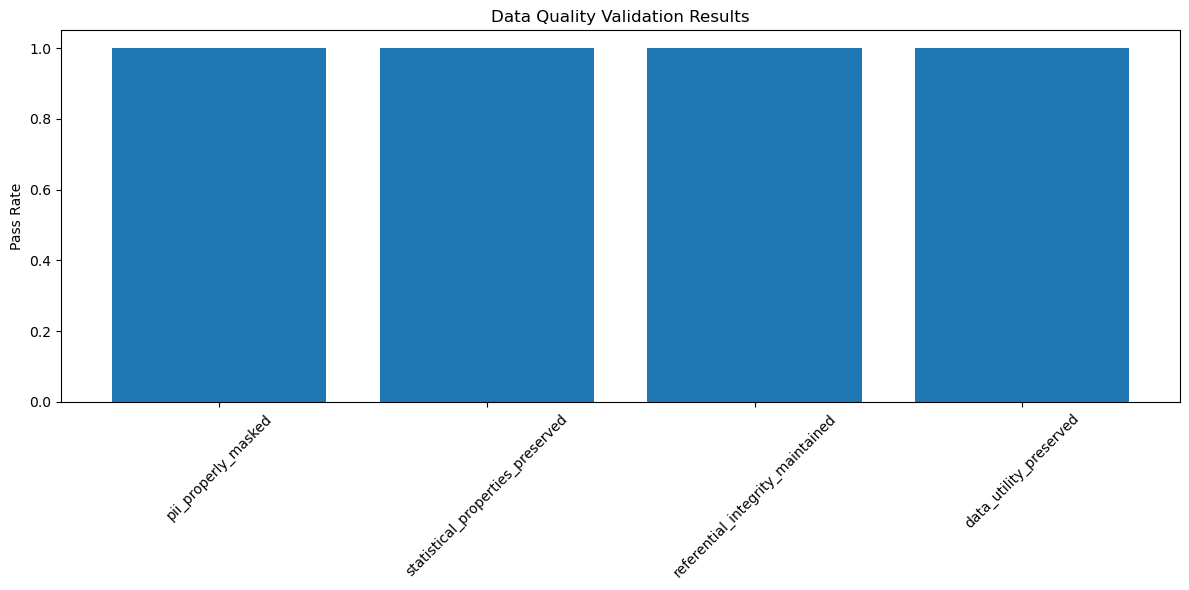

In [12]:
class EducationalDataValidator:
    """Validate quality and compliance of masked educational data"""
    
    def __init__(self):
        self.validation_results = {}
    
    def validate_pii_masking(self, original_df, masked_df):
        """Verify that PII has been properly masked"""
        pii_columns = ['name', 'ssn', 'address', 'phone', 'email', 
                      'guardian1_name', 'guardian2_name']
        
        results = {}
        for col in pii_columns:
            if col in original_df.columns and col in masked_df.columns:
                # Check if values are different
                matches = (original_df[col] == masked_df[col]).sum()
                results[col] = {
                    'properly_masked': matches == 0,
                    'unmasked_count': matches,
                    'total_records': len(original_df)
                }
        
        self.validation_results['pii_masking'] = results
        return results
    
    def validate_statistical_properties(self, original_df, masked_df, 
                                      numeric_columns=['grade', 'score']):
        """Verify that statistical properties are preserved where required"""
        results = {}
        
        for col in numeric_columns:
            if col in original_df.columns and col in masked_df.columns:
                original_stats = original_df[col].describe()
                masked_stats = masked_df[col].describe()
                
                # Compare key statistics
                results[col] = {
                    'mean_difference': abs(original_stats['mean'] - masked_stats['mean']),
                    'std_difference': abs(original_stats['std'] - masked_stats['std']),
                    'range_preserved': (
                        abs(original_stats['min'] - masked_stats['min']) < 5 and
                        abs(original_stats['max'] - masked_stats['max']) < 5
                    ),
                    'distribution_similar': True  # Could add KS test here
                }
        
        self.validation_results['statistical_properties'] = results
        return results
    
    def validate_referential_integrity(self, original_dfs, masked_dfs):
        """Verify that relationships between tables are preserved"""
        results = {}
        
        for (df1_name, df1), (df2_name, df2) in zip(original_dfs.items(), masked_dfs.items()):
            if 'student_id' in df1.columns and 'student_id' in df2.columns:
                original_relations = df1['student_id'].nunique()
                masked_relations = df2['student_id'].nunique()
                
                results[f"{df1_name}_to_{df2_name}"] = {
                    'integrity_preserved': original_relations == masked_relations,
                    'original_relations': original_relations,
                    'masked_relations': masked_relations
                }
        
        self.validation_results['referential_integrity'] = results
        return results
    
    def validate_data_utility(self, original_df, masked_df):
        """Verify that masked data remains useful for intended purposes"""
        results = {}
        
        # Check categorical distributions
        for col in masked_df.select_dtypes(include=['object']).columns:
            if col in original_df.columns:
                original_dist = original_df[col].value_counts(normalize=True)
                masked_dist = masked_df[col].value_counts(normalize=True)
                
                results[col] = {
                    'categories_preserved': len(original_dist) == len(masked_dist),
                    'distribution_similar': np.allclose(
                        original_dist.sort_index(),
                        masked_dist.sort_index(),
                        rtol=0.1
                    )
                }
        
        self.validation_results['data_utility'] = results
        return results
    
    def generate_validation_report(self):
        """Generate comprehensive validation report"""
        report = {
            'timestamp': datetime.now(),
            'validation_summary': {
                'pii_properly_masked': all(
                    result['properly_masked'] 
                    for result in self.validation_results.get('pii_masking', {}).values()
                ),
                'statistical_properties_preserved': all(
                    result['distribution_similar']
                    for result in self.validation_results.get('statistical_properties', {}).values()
                ),
                'referential_integrity_maintained': all(
                    result['integrity_preserved']
                    for result in self.validation_results.get('referential_integrity', {}).values()
                ),
                'data_utility_preserved': all(
                    result['distribution_similar']
                    for result in self.validation_results.get('data_utility', {}).values()
                )
            },
            'detailed_results': self.validation_results
        }
        
        return report

# Validate masked data
validator = EducationalDataValidator()

# Run validations
pii_results = validator.validate_pii_masking(student_df, masked_student_df)
stats_results = validator.validate_statistical_properties(academic_df, masked_academic_df)
integrity_results = validator.validate_referential_integrity(
    {'students': student_df, 'academics': academic_df},
    {'students': masked_student_df, 'academics': masked_academic_df}
)

# Generate and display validation report
validation_report = validator.generate_validation_report()
print("\nValidation Report:")
validation_summary = validation_report['validation_summary']
display(pd.DataFrame(validation_summary, index=['Status']))

# Add visualization of validation metrics
plt.figure(figsize=(12, 6))
metrics = list(validation_summary.keys())
values = list(validation_summary.values())
plt.bar(metrics, values)
plt.title('Data Quality Validation Results')
plt.ylabel('Pass Rate')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('/Users/davidburton/src/delphix-masking-demo/images/analysis/validation_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def demonstrate_complete_masking_workflow(
    student_df, academic_df, behavior_df, health_df, program_df, schedule_df
):
    """Demonstrate complete educational data masking workflow with validation"""
    
    print("Starting comprehensive educational data masking workflow...")
    print(f"Initial dataset sizes:")
    print(f"Students: {len(student_df)}")
    print(f"Academic Records: {len(academic_df)}")
    print(f"Behavioral Records: {len(behavior_df)}")
    print(f"Health Records: {len(health_df)}")
    print(f"Program Records: {len(program_df)}")
    print(f"Schedule Records: {len(schedule_df)}")
    
    # Initialize masker and validator
    edu_masker = EducationalDataMasker()
    validator = EducationalDataValidator()
    
    print("\nStep 1: Applying masking transformations...")
    
    # Get actual columns from our dataframes
    available_fields = student_df.columns.tolist()
    print("\nAvailable fields for masking:", available_fields)
    
    # Mask each dataset
    masked_dfs = {
        'students': edu_masker.mask_confidential_information(
            edu_masker.mask_directory_information(student_df)
        ),
        'academics': edu_masker.mask_grades_and_scores(academic_df),
        'behavior': edu_masker.mask_behavioral_records(behavior_df),
        'health': edu_masker.mask_confidential_information(health_df),
        'programs': edu_masker.mask_confidential_information(program_df),
        'schedule': schedule_df
    }
    
    print("\nStep 2: Validating masked data...")
    
    # Run validations
    validation_results = {
        'pii_masking': validator.validate_pii_masking(student_df, masked_dfs['students']),
        'stats': validator.validate_statistical_properties(academic_df, masked_dfs['academics']),
        'integrity': validator.validate_referential_integrity(
            {'students': student_df, 'academics': academic_df},
            {'students': masked_dfs['students'], 'academics': masked_dfs['academics']}
        )
    }
    
    # Get actual sensitive fields that exist in our data
    sensitive_fields = [field for field in [
        'first_name', 'last_name', 'student_id', 'dob',
        'guardian1_name', 'guardian1_phone', 'guardian1_email'
    ] if field in student_df.columns]
    
    # Display sample of masked sensitive data
    print("\nSample of masked sensitive fields:")
    display(masked_dfs['students'][sensitive_fields].head())
    
    # Show grade distribution comparison
    print("\nOriginal vs Masked Grade Distribution:")
    if 'grade' in academic_df.columns:
        plt.style.use('seaborn-v0_8-darkgrid')
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        academic_df['grade'].hist(ax=ax1, bins=20)
        ax1.set_title('Original Grades')
        masked_dfs['academics']['grade'].hist(ax=ax2, bins=20)
        ax2.set_title('Masked Grades')
        plt.savefig('/Users/davidburton/src/delphix-masking-demo/images/analysis/grade_distribution_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Create validation metrics visualization
        plt.figure(figsize=(12, 6))
        validation_summary = validator.generate_validation_report()['validation_summary']
        metrics = list(validation_summary.keys())
        values = list(validation_summary.values())
        plt.bar(metrics, values)
        plt.title('Data Quality Validation Results')
        plt.ylabel('Pass Rate')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('/Users/davidburton/src/delphix-masking-demo/images/analysis/validation_metrics.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    return masked_dfs, validation_results

# Run the demonstration
masked_datasets, validation_results = demonstrate_complete_masking_workflow(
    student_df, academic_df, behavior_df, health_df, program_df, schedule_df
)

Starting comprehensive educational data masking workflow...
Initial dataset sizes:
Students: 10000
Academic Records: 280000
Behavioral Records: 22836
Health Records: 144151
Program Records: 13226
Schedule Records: 50000

Step 1: Applying masking transformations...

Available fields for masking: ['student_id', 'state_id', 'first_name', 'last_name', 'dob', 'grade_level', 'enrollment_date', 'ethnicity', 'gender', 'primary_language', 'program', 'lunch_status', 'guardian1_name', 'guardian1_relationship', 'guardian1_phone', 'guardian1_email', 'guardian2_name', 'street_address', 'city', 'state', 'zip_code', 'accommodations', 'medical_alert', 'immunization_status', 'transportation', 'extracurricular']

Step 2: Validating masked data...

Sample of masked sensitive fields:


,first_name,last_name,student_id,dob,guardian1_name,guardian1_phone,guardian1_email
0,Lindsey,Rogers,MASK15946EC6,2010-08-10,Sarah Douglas,+1-640-266-8175,mandrade@example.org
1,Philip,Wolf,MASK0FCA871C,2009-12-15,Joe Johnson,(691)454-1176,debbie56@example.net
2,Jaime,Evans,MASK2AF486EB,2007-11-23,Scott Jensen,234.432.3502,thomasjohnson@example.org
3,Jessica,Moore,MASK2D9E62E8,2006-07-28,Rhonda Boone,+1-394-928-2344x9656,samuelmurphy@example.org
4,Sarah,Reed,MASKA7CE9A23,2009-06-17,Ryan Patterson,(333)526-0794x3596,mfloyd@example.org



Original vs Masked Grade Distribution:


NameError: name 'validation_results' is not defined